In [1]:
from pathlib import Path
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [2]:
episode_breaks        = [0, 20, 44, 62, 86, 105, 121, 148, 161, 188, 207, 224, 249, 265, 288, 304, 325, 344, 362, 387, 409]
episode_cell_activity = [2.4014, 2.4977, 2.4484, 2.3806, 2.3349, 2.2423, 2.2253, 2.1686, 2.1767, 2.0925, 2.0978, 2.6866, 2.6832, 2.6742, 2.6775, 2.6671, 2.6124, 2.571, 2.528, 2.510, 2.497]


In [3]:
# CL1 logs
log_path = Path("checkpoints/2025-11-27_43599_cl1-2507-15/training_log.jsonl")
with open(log_path, mode="r", encoding="utf-8") as f:
    lines = f.readlines()
    logs = \
        [
            json.loads(line) for line in lines
        ]

logs = pd.DataFrame(logs)
logs


,total_episodes,episode_reward,episode_length,success_actions,fail_actions,neutral_actions,success_rate,total_steps
0,1,-729.773148,117,63,50,0,0.557522,116
1,2,-321.670929,375,206,167,0,0.552279,491
2,3,-290.231842,183,102,80,0,0.560440,674
3,4,-156.152588,375,190,178,0,0.516304,1049
4,5,-293.735565,375,194,175,0,0.525745,1424
...,...,...,...,...,...,...,...,...
404,405,-411.183716,79,46,32,0,0.589744,95487
405,406,15.593475,305,169,132,0,0.561462,95792
406,407,-747.946548,157,80,68,0,0.540541,95949
407,408,-807.272064,68,30,34,0,0.468750,96017


In [4]:
# SDK logs
log_path_sdk = Path("checkpoints/2025-11-28_sdk/training_log.jsonl")
with open(log_path_sdk, mode="r", encoding="utf-8") as f:
    lines = f.readlines()
    logs_sdk = \
        [
            json.loads(line) for line in lines
        ]

logs_sdk = pd.DataFrame(logs_sdk)
logs_sdk


,total_episodes,episode_reward,episode_length,success_actions,fail_actions,neutral_actions,success_rate,total_steps
0,1,-424.034805,72,50,21,0,0.704225,71
1,2,-360.475082,68,44,23,0,0.656716,139
2,3,-338.045578,332,172,150,0,0.534161,471
3,4,-308.408676,192,99,76,0,0.565714,663
4,5,-421.711304,54,38,14,0,0.730769,717
...,...,...,...,...,...,...,...,...
398,399,-235.771149,209,103,100,0,0.507389,46687
399,400,-272.500885,54,39,14,0,0.735849,46741
400,401,-337.367020,81,40,33,0,0.547945,46822
401,402,-393.172089,55,34,17,0,0.666667,46877


In [5]:
# CL1 checkpoint, eval using SDK logs
log_path_cl1_sdk = Path("checkpoints/2025-11-27_43599_cl1-2507-15/2025-11-28 eval_log cl1_sdk.jsonl")
with open(log_path_cl1_sdk, mode="r", encoding="utf-8") as f:
    lines = f.readlines()
    logs_cl1_sdk = \
        [
            json.loads(line) for line in lines
        ]

logs_cl1_sdk = pd.DataFrame(logs_cl1_sdk)
logs_cl1_sdk


,total_episodes,episode_reward,episode_length,success_actions,fail_actions,neutral_actions,success_rate,total_steps
0,410,594.817917,375,195,178,0,0.522788,96640
1,411,-841.682831,92,51,35,0,0.593023,96732
2,412,-221.805069,350,194,151,0,0.562319,97082
3,413,-786.152176,96,38,51,0,0.426966,97178
4,414,-52.332489,375,187,175,0,0.516575,97553
...,...,...,...,...,...,...,...,...
391,801,-226.352325,258,126,117,0,0.518519,189068
392,802,-515.360291,83,41,38,0,0.518987,189151
393,803,-700.925781,189,92,94,0,0.494624,189340
394,804,205.123779,375,185,186,0,0.498652,189715


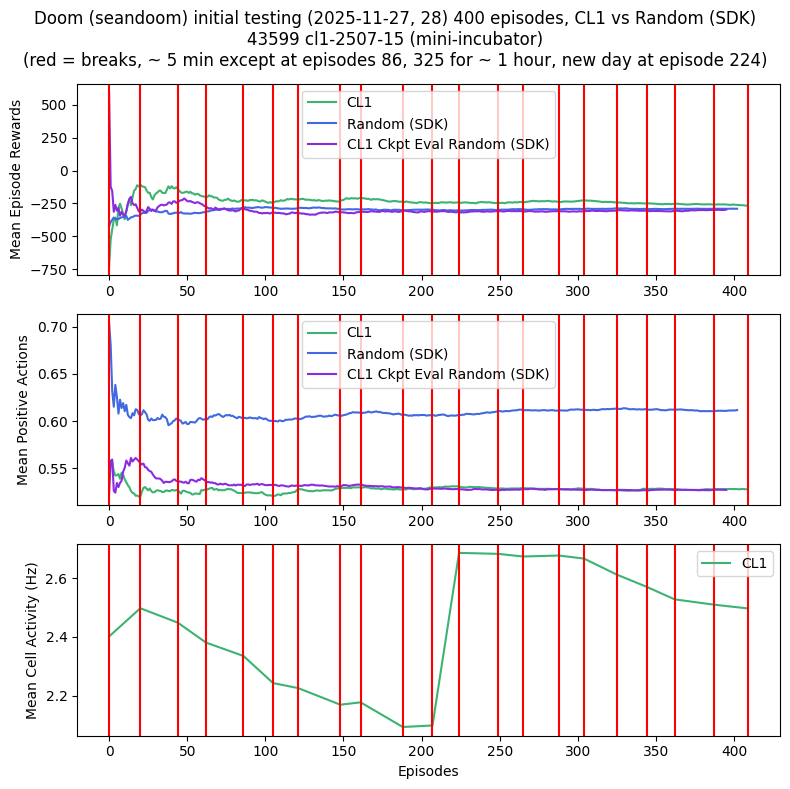

In [7]:
n_axes     = 3

colour_cl1 = "mediumseagreen"
colour_sdk = "royalblue"
colour_cl1_sdk = "blueviolet"

label_cl1  = "CL1"
label_sdk  = "Random (SDK)"
label_cl1_sdk  = "CL1 Ckpt Eval Random (SDK)"

fig        = plt.figure(figsize=(8, 8))
gs         = GridSpec(nrows=n_axes, ncols=1)
axes       = []
for i in range(n_axes):
    axes.append(fig.add_subplot(gs[i, 0], sharex=axes[0] if i > 0 else None))

#
# Reward
#

episode_reward            = logs["episode_reward"]
cumulative_episode_reward = np.cumsum(episode_reward) / np.arange(1, len(episode_reward) + 1)

episode_reward_sdk            = logs_sdk["episode_reward"]
cumulative_episode_reward_sdk = np.cumsum(episode_reward_sdk) / np.arange(1, len(episode_reward_sdk) + 1)

episode_reward_cl1_sdk            = logs_cl1_sdk["episode_reward"]
cumulative_episode_reward_cl1_sdk = np.cumsum(episode_reward_cl1_sdk) / np.arange(1, len(episode_reward_cl1_sdk) + 1)

axes[0].plot(cumulative_episode_reward, c=colour_cl1, label=label_cl1)
axes[0].plot(cumulative_episode_reward_sdk, c=colour_sdk, label=label_sdk)
axes[0].plot(cumulative_episode_reward_cl1_sdk, c=colour_cl1_sdk, label=label_cl1_sdk)
axes[0].set_ylabel("Mean Episode Rewards")
axes[0].legend()

#
# Success rate
#

success_rate             = logs["success_rate"]
cumulative_success_rates = np.cumsum(success_rate) / np.arange(1, len(success_rate) + 1)

success_rate_sdk             = logs_sdk["success_rate"]
cumulative_success_rates_sdk = np.cumsum(success_rate_sdk) / np.arange(1, len(success_rate_sdk) + 1)

success_rate_cl1_sdk             = logs_cl1_sdk["success_rate"]
cumulative_success_rates_cl1_sdk = np.cumsum(success_rate_cl1_sdk) / np.arange(1, len(success_rate_cl1_sdk) + 1)

axes[1].plot(cumulative_success_rates, c=colour_cl1, label=label_cl1)
axes[1].plot(cumulative_success_rates_sdk, c=colour_sdk, label=label_sdk)
axes[1].plot(cumulative_success_rates_cl1_sdk, c=colour_cl1_sdk, label=label_cl1_sdk)
axes[1].set_ylabel("Mean Positive Actions")
axes[1].legend()

#
# Cell activity
#

axes[2].plot(episode_breaks, episode_cell_activity, c=colour_cl1, label=label_cl1)
axes[2].set_ylabel("Mean Cell Activity (Hz)")
axes[2].legend()

for ax in axes:
    for episode in episode_breaks:
        ax.axvline(episode, c="red")

fig.suptitle(
    "Doom (seandoom) initial testing (2025-11-27, 28) 400 episodes, CL1 vs Random (SDK)\n"
    f"43599 cl1-2507-15 (mini-incubator)\n"
    "(red = breaks, ~ 5 min except at episodes 86, 325 for ~ 1 hour, new day at episode 224)"
    )

axes[-1].set_xlabel("Episodes")

fig.tight_layout()
plt.show()
